In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
plt.rcParams['font.sans-serif'] = ['SimHei']        # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False          # 正确显示负号


# 读取用户上传的 traffic.csv 文件
df = pd.read_csv("C:/Users/Administrator/Desktop/traffic.csv")

# 转换 DateTime 为 datetime 类型
df['DateTime'] = pd.to_datetime(df['DateTime'])

# 提取时间特征
df['hour'] = df['DateTime'].dt.hour
df['weekday'] = df['DateTime'].dt.weekday  # 周一=0，周日=6
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# 查看前几行
df.head(10)


,DateTime,Junction,Vehicles,ID,hour,weekday,is_weekend
0,2015-11-01 00:00:00,1,15,20151101001,0,6,1
1,2015-11-01 01:00:00,1,13,20151101011,1,6,1
2,2015-11-01 02:00:00,1,10,20151101021,2,6,1
3,2015-11-01 03:00:00,1,7,20151101031,3,6,1
4,2015-11-01 04:00:00,1,9,20151101041,4,6,1
5,2015-11-01 05:00:00,1,6,20151101051,5,6,1
6,2015-11-01 06:00:00,1,9,20151101061,6,6,1
7,2015-11-01 07:00:00,1,8,20151101071,7,6,1
8,2015-11-01 08:00:00,1,11,20151101081,8,6,1
9,2015-11-01 09:00:00,1,12,20151101091,9,6,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. 设定特征 X 和目标 y
X = df.drop(columns=['Vehicles','ID','DateTime'])
y = df['Vehicles']

# 2. 划分训练集和测试集（80%训练，20%测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 建立并训练模型
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 模型预测
y_pred = model.predict(X_test)

# 5. 模型评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"均方误差（MSE）：{mse:.2f}")
print(f"R² 分数：{r2:.2f}")


均方误差（MSE）：224.69
R² 分数：0.45


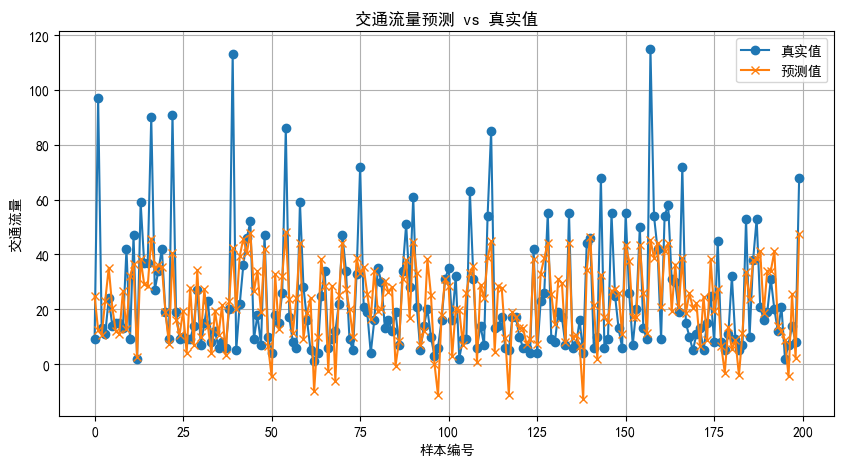

In [3]:
import matplotlib.pyplot as plt

# 画一段前100条数据对比（防止太长）
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:200], label='真实值', marker='o')
plt.plot(y_pred[:200], label='预测值', marker='x')
plt.title('交通流量预测 vs 真实值')
plt.xlabel('样本编号')
plt.ylabel('交通流量')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import chinese_calendar
def is_holiday(date):
    return chinese_calendar.is_holiday(date) or chinese_calendar.is_in_lieu(date)
df['is_holiday'] = df['DateTime'].apply(is_holiday).astype(int)  # 节假日为1，非节假日为0
df.head(10)

,DateTime,Junction,Vehicles,ID,hour,weekday,is_weekend,is_holiday
0,2015-11-01 00:00:00,1,15,20151101001,0,6,1,1
1,2015-11-01 01:00:00,1,13,20151101011,1,6,1,1
2,2015-11-01 02:00:00,1,10,20151101021,2,6,1,1
3,2015-11-01 03:00:00,1,7,20151101031,3,6,1,1
4,2015-11-01 04:00:00,1,9,20151101041,4,6,1,1
5,2015-11-01 05:00:00,1,6,20151101051,5,6,1,1
6,2015-11-01 06:00:00,1,9,20151101061,6,6,1,1
7,2015-11-01 07:00:00,1,8,20151101071,7,6,1,1
8,2015-11-01 08:00:00,1,11,20151101081,8,6,1,1
9,2015-11-01 09:00:00,1,12,20151101091,9,6,1,1


In [5]:
X = df.drop(columns=['Vehicles','ID','DateTime'])
y = df['Vehicles']

# 2. 划分训练集和测试集（80%训练，20%测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 建立并训练模型
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 模型预测
y_pred = model.predict(X_test)

# 5. 模型评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"均方误差（MSE）：{mse:.2f}")
print(f"R² 分数：{r2:.2f}")

均方误差（MSE）：224.69
R² 分数：0.45


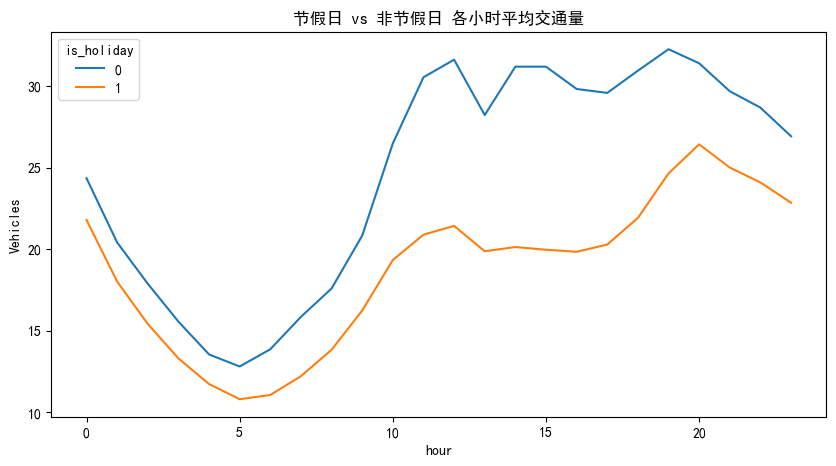

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 分组平均交通量
avg_traffic = df.groupby(['is_holiday', 'hour'])['Vehicles'].mean().reset_index()
avg_traffic
plt.figure(figsize=(10,5))
sns.lineplot(data=avg_traffic, x='hour', y='Vehicles', hue='is_holiday')  #hue='is_holiday'：根据“是否节假日”这个字段，画出 两条不同颜色的曲线
plt.title("节假日 vs 非节假日 各小时平均交通量")
plt.show()


In [7]:
start_date = datetime(2015, 11, 1)
end_date = datetime(2017, 6, 30)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# 模拟天气信息
weather_df = pd.DataFrame({
    'DateTime': date_range.date,
    'temperature': np.random.normal(20, 5, len(date_range)).round(1),  # 平均20度，标准差5
    'rain': np.random.binomial(1, 0.2, len(date_range)),  # 20% 的概率下雨
    'weather_condition': np.random.choice(['晴', '多云', '小雨', '雷阵雨'], len(date_range))
})

# 预览
print(weather_df.head())

     DateTime  temperature  rain weather_condition
0  2015-11-01         18.2     1                多云
1  2015-11-02         20.7     0                小雨
2  2015-11-03         21.6     0                 晴
3  2015-11-04         16.5     0               雷阵雨
4  2015-11-05         10.6     0               雷阵雨


In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime']).dt.date 
df_merged = pd.merge(df, weather_df, how='left', on='DateTime')
df_merged.head()

,DateTime,Junction,Vehicles,ID,hour,weekday,is_weekend,is_holiday,temperature,rain,weather_condition
0,2015-11-01,1,15,20151101001,0,6,1,1,18.2,1,多云
1,2015-11-01,1,13,20151101011,1,6,1,1,18.2,1,多云
2,2015-11-01,1,10,20151101021,2,6,1,1,18.2,1,多云
3,2015-11-01,1,7,20151101031,3,6,1,1,18.2,1,多云
4,2015-11-01,1,9,20151101041,4,6,1,1,18.2,1,多云


In [9]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DateTime           48120 non-null  object 
 1   Junction           48120 non-null  int64  
 2   Vehicles           48120 non-null  int64  
 3   ID                 48120 non-null  int64  
 4   hour               48120 non-null  int32  
 5   weekday            48120 non-null  int32  
 6   is_weekend         48120 non-null  int64  
 7   is_holiday         48120 non-null  int64  
 8   temperature        48120 non-null  float64
 9   rain               48120 non-null  int32  
 10  weather_condition  48120 non-null  object 
dtypes: float64(1), int32(3), int64(5), object(2)
memory usage: 3.5+ MB


In [10]:
# 将 df 数据保存为 CSV 文件
df_merged.to_csv('交通流量模型.csv', index=False)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 224.68960215014303
R²: 0.4486777149090041


In [12]:
a = ['Junction', 'hour', 'weekday', 'is_weekend', 'is_holiday',
            'temperature', 'rain', 'weather_condition']
df_encoded = pd.get_dummies(df_merged[a], columns=['weather_condition']).astype(int)
df_encoded.head()

,Junction,hour,weekday,is_weekend,is_holiday,temperature,rain,weather_condition_多云,weather_condition_小雨,weather_condition_晴,weather_condition_雷阵雨
0,1,0,6,1,1,18,1,1,0,0,0
1,1,1,6,1,1,18,1,1,0,0,0
2,1,2,6,1,1,18,1,1,0,0,0
3,1,3,6,1,1,18,1,1,0,0,0
4,1,4,6,1,1,18,1,1,0,0,0


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df_encoded
y = df_merged['Vehicles']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# 创建模型，设置一些参数（可调）
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 模型训练
rf_model.fit(X_train, y_train)
# 模型预测
y_pred = rf_model.predict(X_test)

# 模型评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ MSE: {mse:.2f}")
print(f"✅ R² : {r2:.4f}")


✅ MSE: 102.13
✅ R² : 0.7494


In [14]:
from xgboost import XGBRegressor
X = df_encoded
y = df_merged['Vehicles']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# 创建模型，设置一些参数（可调）
model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)

# 模型训练
rf_model.fit(X_train, y_train)
# 模型预测
y_pred = rf_model.predict(X_test)

# 模型评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ MSE: {mse:.2f}")
print(f"✅ R² : {r2:.4f}")


✅ MSE: 102.13
✅ R² : 0.7494


In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
from matplotlib import rcParams



rcParams['font.family'] = font_manager.FontProperties(fname="C:/Windows/Fonts/simhei.ttf").get_name()
rcParams['axes.unicode_minus'] = False


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18948\2080984839.py:21: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18948\2080984839.py:21: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18948\2080984839.py:21: UserWarning: Glyph 36710 (\N{CJK UNIFIED IDEOGRAPH-8F66}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18948\2080984839.py:21: UserWarning: Glyph 36742 (\N{CJK UNIFIED IDEOGRAPH-8F86}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18948\2080984839.py:21: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18948\2080984839.py:21: UserWarni

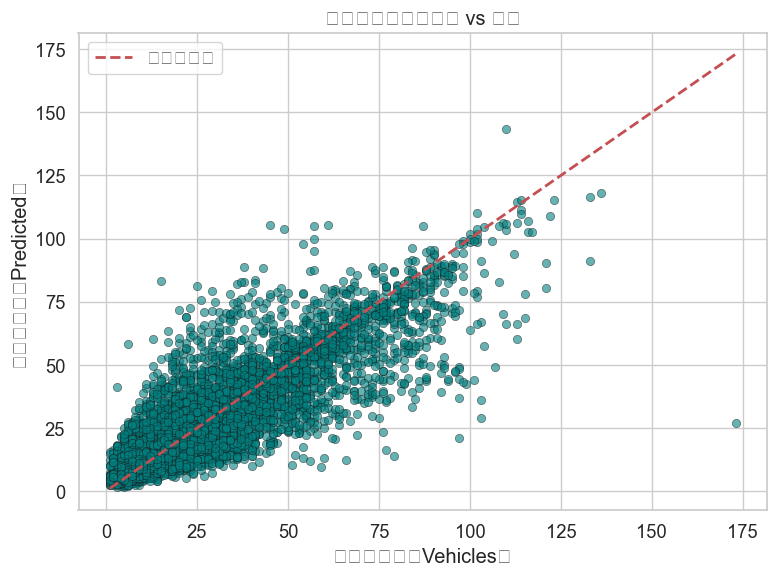

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用 seaborn 的样式
sns.set(style="whitegrid", font_scale=1.2)

# 创建图形和子图
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal', edgecolor='k', alpha=0.6)

# 添加理想预测线（对角线）
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='理想预测线')

# 添加标签和标题
plt.xlabel('实际车辆数（Vehicles）')
plt.ylabel('预测车辆数（Predicted）')
plt.title('交通流量预测：实际 vs 预测')
plt.legend()
plt.tight_layout()

# 显示图表
plt.show()
